# BEEF - Minerva SA

In [1]:
from data_functions import *

I will be giving investment recommendations for the company BEEF in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [2]:
BEEF = pd.read_csv('./Data/Brazil - Minerva SA_Brazil (BEEF3).csv')

In [3]:
BEEF

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",10.2,10.35,10.4,10.12,7.77M,-1.54%
1,"Mar 30, 2021",10.36,10.41,10.62,10.3,9.93M,-1.05%
2,"Mar 29, 2021",10.47,9.85,10.5,9.81,22.04M,6.51%
3,"Mar 26, 2021",9.83,9.8,9.94,9.7,5.11M,0.31%
4,"Mar 25, 2021",9.8,10.01,10.01,9.66,8.88M,-1.51%
...,...,...,...,...,...,...,...
305,"Jan 07, 2020",13.48,13.03,13.48,13.03,8.20M,4.58%
306,"Jan 06, 2020",12.89,12.9,12.91,12.57,4.17M,-0.08%
307,"Jan 03, 2020",12.9,12.45,12.93,12.27,4.88M,2.63%
308,"Jan 02, 2020",12.57,12.88,12.99,12.57,5.78M,-2.10%


In [4]:
## drop last row because it doesn't contain relevant information

BEEF.drop(309, inplace=True)

In [5]:
## change date column to datetime

BEEF['Date'] = pd.to_datetime(BEEF['Date'], format='%b %d, %Y')

In [6]:
## change price columns to integer

BEEF['Price'] = pd.to_numeric(BEEF['Price'])
BEEF['Open'] = pd.to_numeric(BEEF['Open'])
BEEF['High'] = pd.to_numeric(BEEF['High'])
BEEF['Low'] = pd.to_numeric(BEEF['Low'])

In [7]:
BEEF.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
BEEF

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,12.57,12.88,12.99,12.57,5.78M,-2.10%
1,2020-01-03,12.90,12.45,12.93,12.27,4.88M,2.63%
2,2020-01-06,12.89,12.90,12.91,12.57,4.17M,-0.08%
3,2020-01-07,13.48,13.03,13.48,13.03,8.20M,4.58%
4,2020-01-08,13.63,13.50,13.68,13.18,6.18M,1.11%
...,...,...,...,...,...,...,...
304,2021-03-25,9.80,10.01,10.01,9.66,8.88M,-1.51%
305,2021-03-26,9.83,9.80,9.94,9.70,5.11M,0.31%
306,2021-03-29,10.47,9.85,10.50,9.81,22.04M,6.51%
307,2021-03-30,10.36,10.41,10.62,10.30,9.93M,-1.05%


In [8]:
## find rows for 2021 data

BEEF.loc[BEEF['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
249,2021-01-04,10.04,10.23,10.32,10.03,6.12M,-1.38%
250,2021-01-05,9.84,10.07,10.10,9.77,13.66M,-1.99%
251,2021-01-06,9.69,9.85,9.86,9.69,8.36M,-1.52%
252,2021-01-07,9.65,9.75,9.81,9.62,7.77M,-0.41%
253,2021-01-08,9.73,9.67,9.85,9.66,7.46M,0.83%
254,2021-01-11,9.61,9.70,9.80,9.60,10.90M,-1.23%
255,2021-01-12,9.99,9.68,10.03,9.62,14.24M,3.95%
256,2021-01-13,9.80,10.05,10.06,9.68,11.38M,-1.90%
257,2021-01-14,9.82,9.86,9.96,9.73,7.00M,0.20%
258,2021-01-15,9.72,9.80,9.82,9.69,6.36M,-1.02%


In [9]:
## split training data and testing data, testing data will be the year of 2021

training_data = BEEF[['Date', 'Price']][:249]
testing_data = BEEF[['Date', 'Price']][249:]

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(BEEF[['Price']])
scaled_train_data = scaled_data[:249]

# Daily

In [11]:
X_train, y_train = get_train_data(scaled_train_data, 6)
X_test, y_test = get_test_data(BEEF, testing_data, scaler, 6)

In [12]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [13]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [14]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.42297694087028503
Epoch  1 MSE:  0.20511388778686523
Epoch  2 MSE:  0.04440179467201233
Epoch  3 MSE:  0.3030572533607483
Epoch  4 MSE:  0.061699070036411285
Epoch  5 MSE:  0.048187341541051865
Epoch  6 MSE:  0.09301671385765076
Epoch  7 MSE:  0.11984746158123016
Epoch  8 MSE:  0.12436997145414352
Epoch  9 MSE:  0.11391676962375641
Epoch  10 MSE:  0.09512942284345627
Epoch  11 MSE:  0.07333964854478836
Epoch  12 MSE:  0.0534590482711792
Epoch  13 MSE:  0.04039965942502022
Epoch  14 MSE:  0.03807324916124344
Epoch  15 MSE:  0.046229295432567596
Epoch  16 MSE:  0.057046640664339066
Epoch  17 MSE:  0.06030438095331192
Epoch  18 MSE:  0.05439065769314766
Epoch  19 MSE:  0.0452677458524704
Epoch  20 MSE:  0.03860020637512207
Epoch  21 MSE:  0.03620621934533119
Epoch  22 MSE:  0.037111762911081314
Epoch  23 MSE:  0.03946810960769653
Epoch  24 MSE:  0.04165102168917656
Epoch  25 MSE:  0.04261581599712372
Epoch  26 MSE:  0.041910164058208466
Epoch  27 MSE:  0.03959025070071220

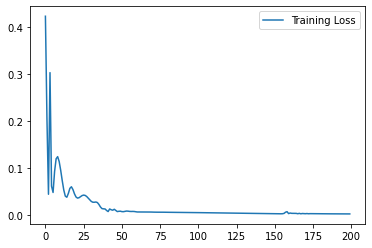

In [15]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [16]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.44 RMSE
Test Score: 0.25 RMSE


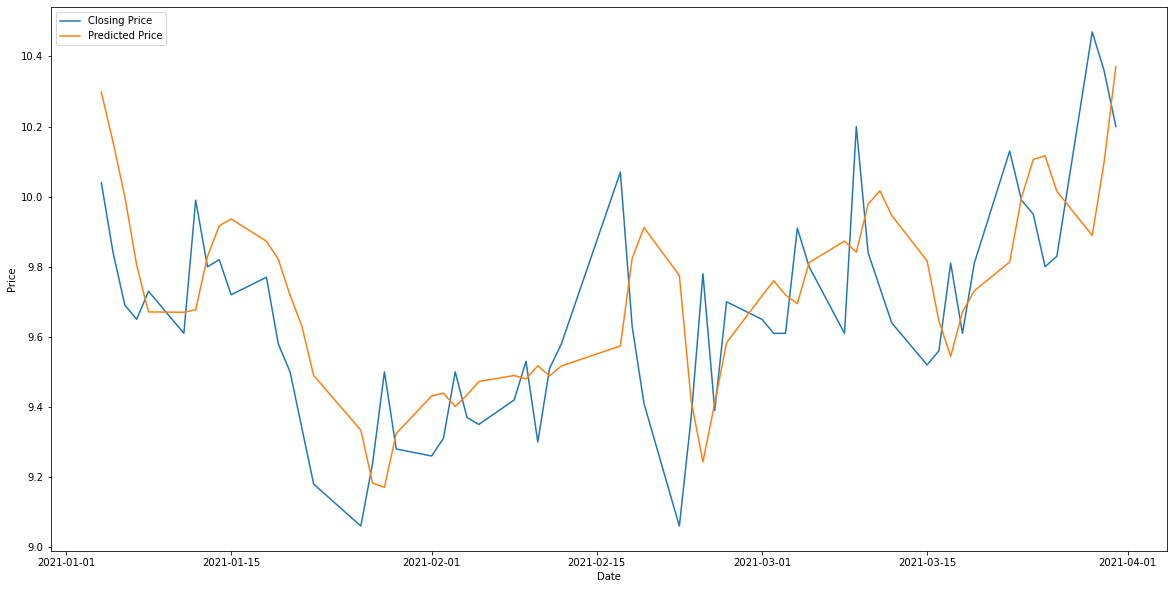

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The daily price predictions are pretty accurate but it seems like they lag behind the actual price by a day or two. Let's see if we can turn a profit using these predictions.

In [18]:
boll_daily = BEEF[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 15)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 15)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_23048/2178820566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_23048/2178820566.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_23048/2178820566.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,12.570000,NaN,NaN,NaN
1,2020-01-03,12.900000,NaN,NaN,NaN
2,2020-01-06,12.890000,NaN,NaN,NaN
3,2020-01-07,13.480000,NaN,NaN,NaN
4,2020-01-08,13.630000,NaN,NaN,NaN
...,...,...,...,...,...
304,2021-03-25,10.116554,9.860662,10.197073,9.524250
305,2021-03-26,10.015105,9.874199,10.218477,9.529922
306,2021-03-29,9.889384,9.875277,10.219642,9.530911
307,2021-03-30,10.097672,9.892345,10.254488,9.530202


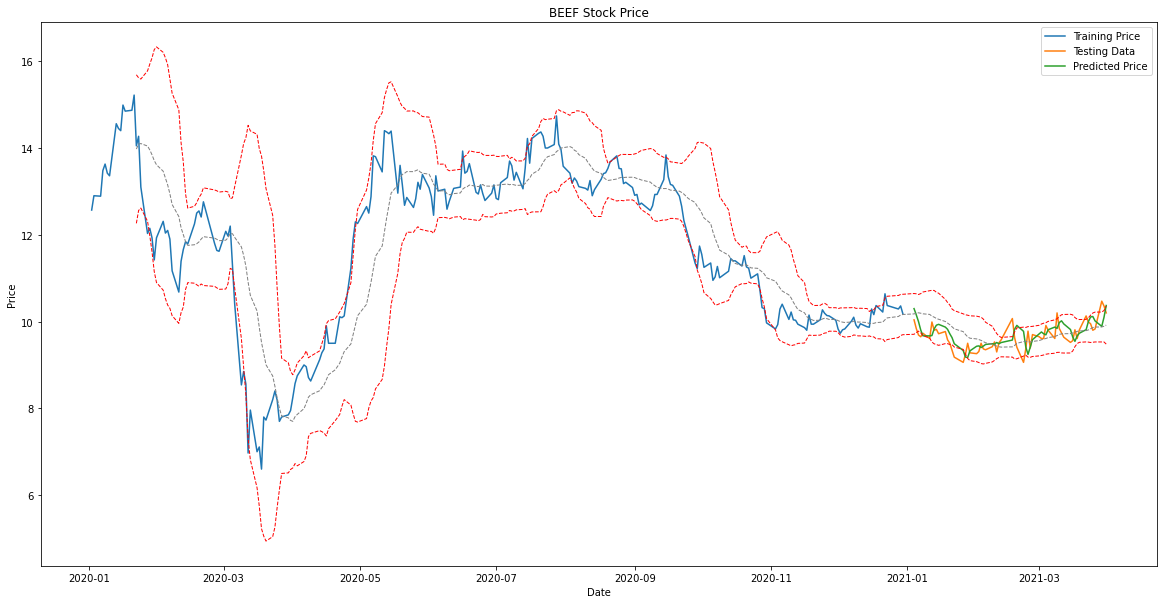

In [19]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BEEF Stock Price')
plt.legend()
plt.show()

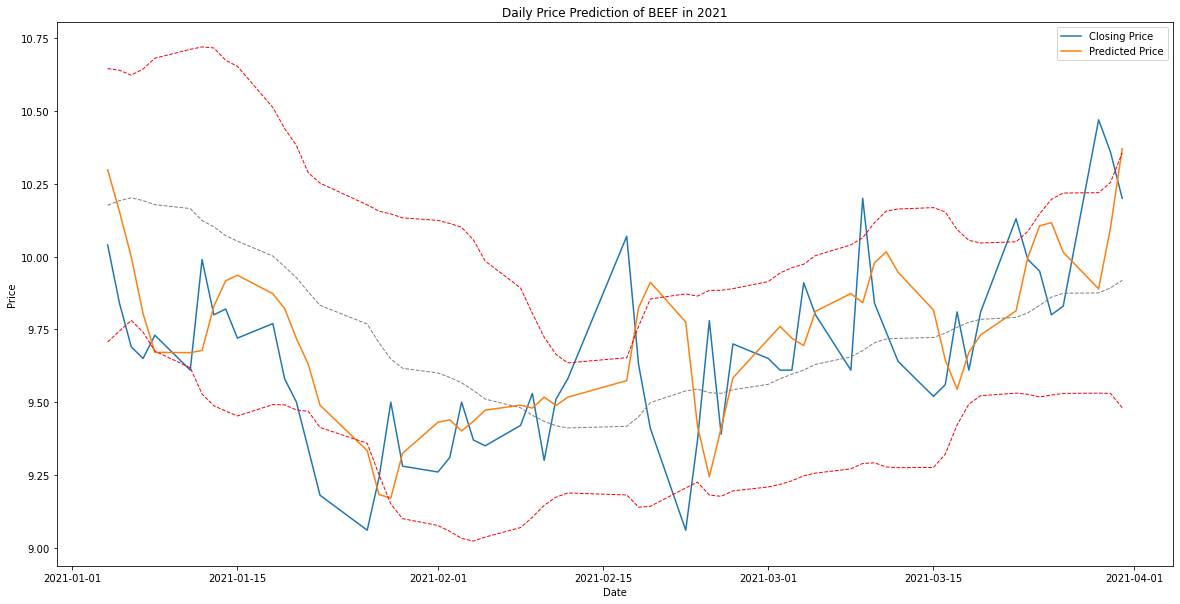

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][249:], boll_daily['upper_bb'][249:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][249:], boll_daily['lower_bb'][249:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][249:], boll_daily['SMA'][249:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of BEEF in 2021')
plt.legend()
plt.show()

Taking a look at the bollinger bands it looks like there are multiple buy and sell indicators that we can use for our investment strategy. We buy when the price hits the lower band and sell when the price hits the upper band. Let's find out where these indicators are and see if we turn a profit using them.

In [21]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_23048/2526091140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
249,2021-01-04,10.298318,10.176555,10.646120,9.706989,10.04
250,2021-01-05,10.154886,10.192214,10.640286,9.744141,9.84
251,2021-01-06,9.998803,10.202134,10.623531,9.780737,9.69
252,2021-01-07,9.804010,10.192401,10.644388,9.740414,9.65
253,2021-01-08,9.671039,10.178470,10.681699,9.675242,9.73
254,2021-01-11,9.670079,10.165142,10.712077,9.618208,9.61
255,2021-01-12,9.677405,10.124303,10.720543,9.528062,9.99
256,2021-01-13,9.829473,10.102268,10.716998,9.487537,9.80
257,2021-01-14,9.916818,10.072055,10.674822,9.469289,9.82
258,2021-01-15,9.936172,10.053134,10.653812,9.452455,9.72


In [22]:
## find buy indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
253,2021-01-08,9.671039,10.178470,10.681699,9.675242,9.73
264,2021-01-26,9.333477,9.768345,10.177896,9.358793,9.06
265,2021-01-27,9.182343,9.703509,10.156433,9.250585,9.24


In [24]:
i_df[i_df['Date'] == '2021-02-23']

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
282,2021-02-23,9.417048,9.544805,9.8643,9.225309,9.37


In [23]:
## find sell indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
279,2021-02-18,9.824143,9.449687,9.760154,9.139219,9.63
280,2021-02-19,9.911916,9.498325,9.854521,9.142129,9.41
308,2021-03-31,10.370782,9.918504,10.356111,9.480897,10.20


There are three buy indicators that I can see on the graph before the first sell indicator, I'll be using the indicator when the lower band crosses the predicted price at the lowest point which is on 01-27-2021 at a closing stock price of \\$9.24. There are two sell indicators that I can use, but without knowing the actual price I would probably use the sell indicator at the higher predicted price which is on 02-18-2021 at a closing price of \\$9.63. This results in a profit of 4.2%.

The second buy indicator I'll use is on 02-23-2021 at a closing price of \\$9.37. The price does not hit the lower bollinger band on the graph but it gets really close. The sell indicator I'll then use is on 03-31-2021 at a closing price of \\$10.20. This results in a profit of 8.9%.

This results in a 13.5% total profit using the daily predictions.

# Weekly

In [144]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 14)
X_test_w, y_test_w = get_weekly_test_data(BEEF, testing_data, scaler, 14)

In [145]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [146]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [147]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.48628318309783936
Epoch  1 MSE:  0.348186194896698
Epoch  2 MSE:  0.18843254446983337
Epoch  3 MSE:  0.05283781513571739
Epoch  4 MSE:  0.14144514501094818
Epoch  5 MSE:  0.07956292480230331
Epoch  6 MSE:  0.053722746670246124
Epoch  7 MSE:  0.05788677558302879
Epoch  8 MSE:  0.06177598237991333
Epoch  9 MSE:  0.06113182008266449
Epoch  10 MSE:  0.05811064690351486
Epoch  11 MSE:  0.054692767560482025
Epoch  12 MSE:  0.05175188183784485
Epoch  13 MSE:  0.04945860803127289
Epoch  14 MSE:  0.04781966283917427
Epoch  15 MSE:  0.04689313843846321
Epoch  16 MSE:  0.04667547345161438
Epoch  17 MSE:  0.046968765556812286
Epoch  18 MSE:  0.047415826469659805
Epoch  19 MSE:  0.047649603337049484
Epoch  20 MSE:  0.047443877905607224
Epoch  21 MSE:  0.046786561608314514
Epoch  22 MSE:  0.04584736004471779
Epoch  23 MSE:  0.044875867664813995
Epoch  24 MSE:  0.04409226030111313
Epoch  25 MSE:  0.04361319541931152
Epoch  26 MSE:  0.043425943702459335
Epoch  27 MSE:  0.0434078127145

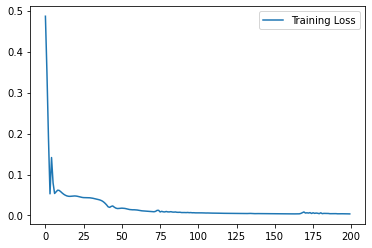

In [148]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [149]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.22 RMSE
Test Score: 9.53 RMSE


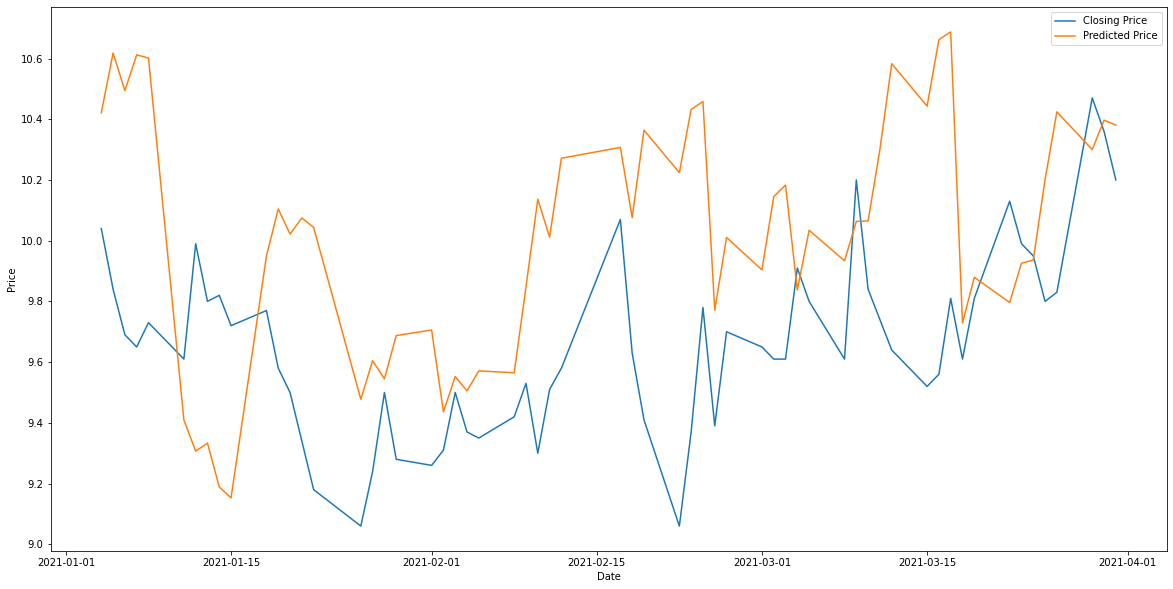

In [150]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The weekly predictions are much more erratic than the daily predictions and do not seem very accurate. Let's see if we can use these predictions to turn a profit.

In [154]:
boll_weekly = BEEF[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 15)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/1389607518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/1389607518.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/1389607518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,12.570000,NaN,NaN,NaN
1,2020-01-03,12.900000,NaN,NaN,NaN
2,2020-01-06,12.890000,NaN,NaN,NaN
3,2020-01-07,13.480000,NaN,NaN,NaN
4,2020-01-08,13.630000,NaN,NaN,NaN
...,...,...,...,...,...
304,2021-03-25,10.201487,10.149427,10.780917,9.517938
305,2021-03-26,10.424434,10.175435,10.818632,9.532237
306,2021-03-29,10.299983,10.199845,10.831432,9.568259
307,2021-03-30,10.396894,10.222067,10.856554,9.587581


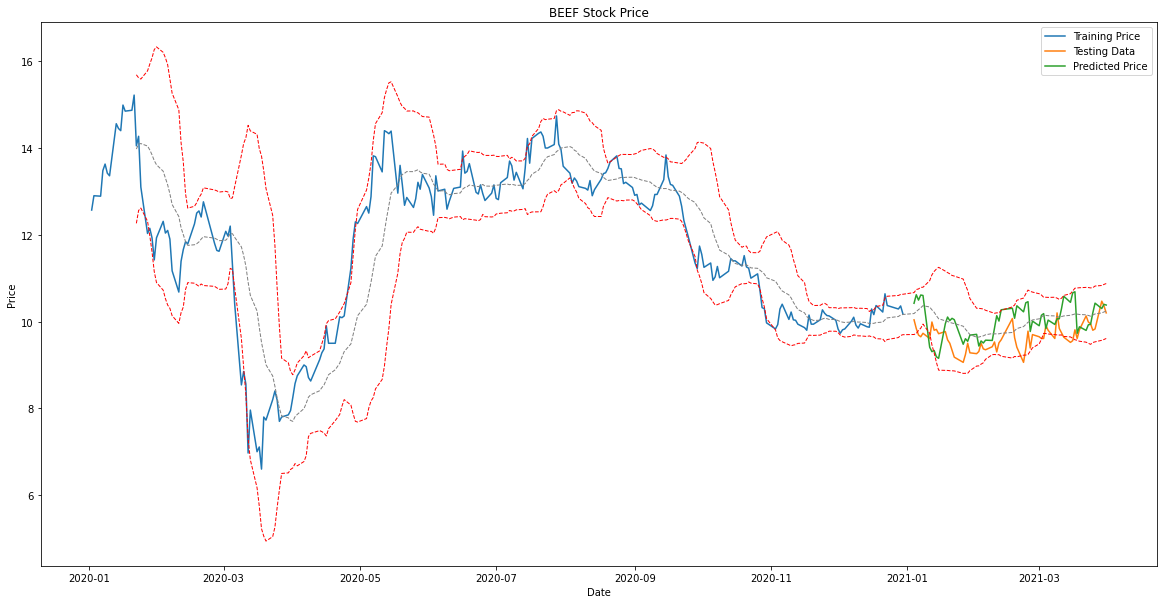

In [155]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BEEF Stock Price')
plt.legend()
plt.show()

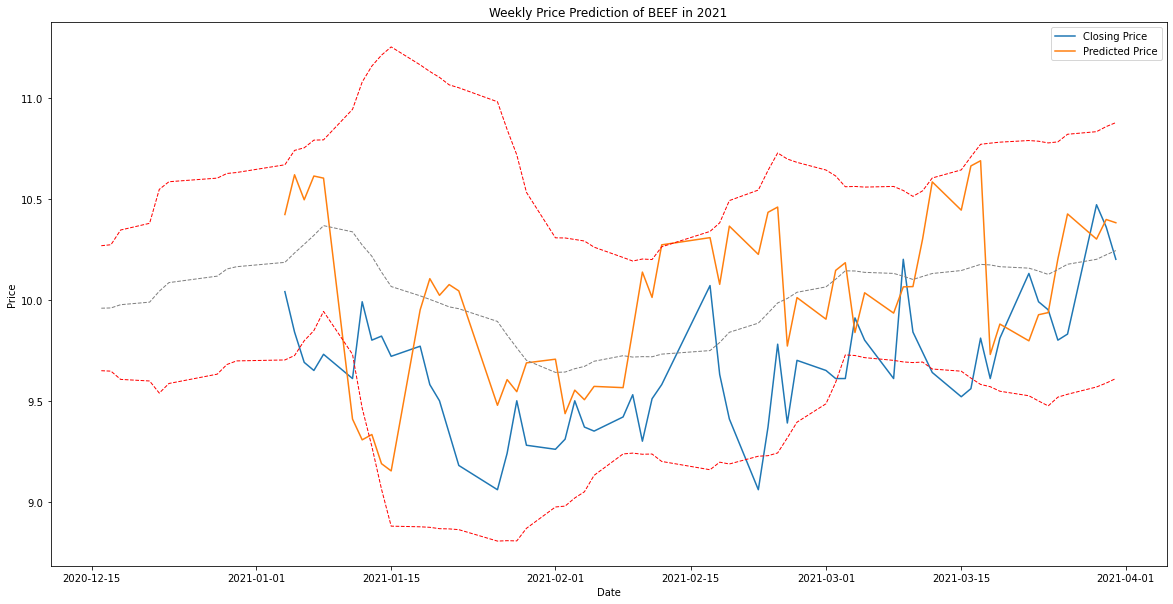

In [156]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][249:], boll_weekly['upper_bb'][249:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][249:], boll_weekly['lower_bb'][249:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][249:], boll_weekly['SMA'][249:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of BEEF in 2021')
plt.legend()
plt.show()

It looks like there is 1 buying indicator I can use in the beginning on January. There are a couple selling indicators I can choose to use, one in the beginning of February and one near the middle of March. Let's see if we are profitable using these 2 indicators.

In [158]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/1562068346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
249,2021-01-04,10.421538,10.184769,10.667588,9.701950,10.04
250,2021-01-05,10.618295,10.231322,10.738762,9.723882,9.84
251,2021-01-06,10.494389,10.274281,10.751580,9.796983,9.69
252,2021-01-07,10.611978,10.318413,10.789586,9.847240,9.65
253,2021-01-08,10.601564,10.366518,10.790873,9.942162,9.73
254,2021-01-11,9.409409,10.335811,10.941890,9.729733,9.61
255,2021-01-12,9.306701,10.270258,11.077045,9.463471,9.99
256,2021-01-13,9.333167,10.215136,11.156044,9.274228,9.80
257,2021-01-14,9.188782,10.136388,11.210097,9.062679,9.82
258,2021-01-15,9.152998,10.065255,11.250780,8.879730,9.72


In [159]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
254,2021-01-11,9.409409,10.335811,10.941890,9.729733,9.61
255,2021-01-12,9.306701,10.270258,11.077045,9.463471,9.99


In [160]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
277,2021-02-12,10.271553,9.730819,10.261803,9.199835,9.58


The buying indicator I will be using is the one where the lower bollinger band hits the price at a lower predicted price point which is on 01-12-2021 at an actual stock price of \\$9.99. The selling indicator I will use will be on 03-12-2021 with a closing price of \\$9.64. I use this selling indicator because even though price doesn't hit the upper bollinger band, it gets really close at a higher predicted price than the indicator on 02-12-2021. This results in a loss of 3.5%.

I was not able to make a profit using the weekly price predictions.

# Monthly

In [207]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 29)
X_test_m, y_test_m = get_monthly_test_data(BEEF, testing_data, scaler, 29)

In [208]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [209]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [210]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.4385572373867035
Epoch  1 MSE:  0.35476183891296387
Epoch  2 MSE:  0.21509648859500885
Epoch  3 MSE:  0.11319877952337265
Epoch  4 MSE:  0.09069711714982986
Epoch  5 MSE:  0.05234498158097267
Epoch  6 MSE:  0.0488663986325264
Epoch  7 MSE:  0.053616344928741455
Epoch  8 MSE:  0.05417926236987114
Epoch  9 MSE:  0.05568805709481239
Epoch  10 MSE:  0.05791014805436134
Epoch  11 MSE:  0.05674142763018608
Epoch  12 MSE:  0.05243095010519028
Epoch  13 MSE:  0.048070620745420456
Epoch  14 MSE:  0.04540025815367699
Epoch  15 MSE:  0.04402095451951027
Epoch  16 MSE:  0.04283837229013443
Epoch  17 MSE:  0.04142787307500839
Epoch  18 MSE:  0.040211271494627
Epoch  19 MSE:  0.039638787508010864
Epoch  20 MSE:  0.039280105382204056
Epoch  21 MSE:  0.03792312741279602
Epoch  22 MSE:  0.03535741940140724
Epoch  23 MSE:  0.0330331064760685
Epoch  24 MSE:  0.03063906915485859
Epoch  25 MSE:  0.02722620591521263
Epoch  26 MSE:  0.026603329926729202
Epoch  27 MSE:  0.03113761730492115
Ep

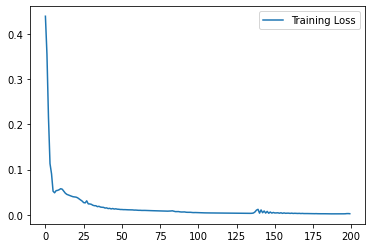

In [211]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [212]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.90 RMSE
Test Score: 9.12 RMSE


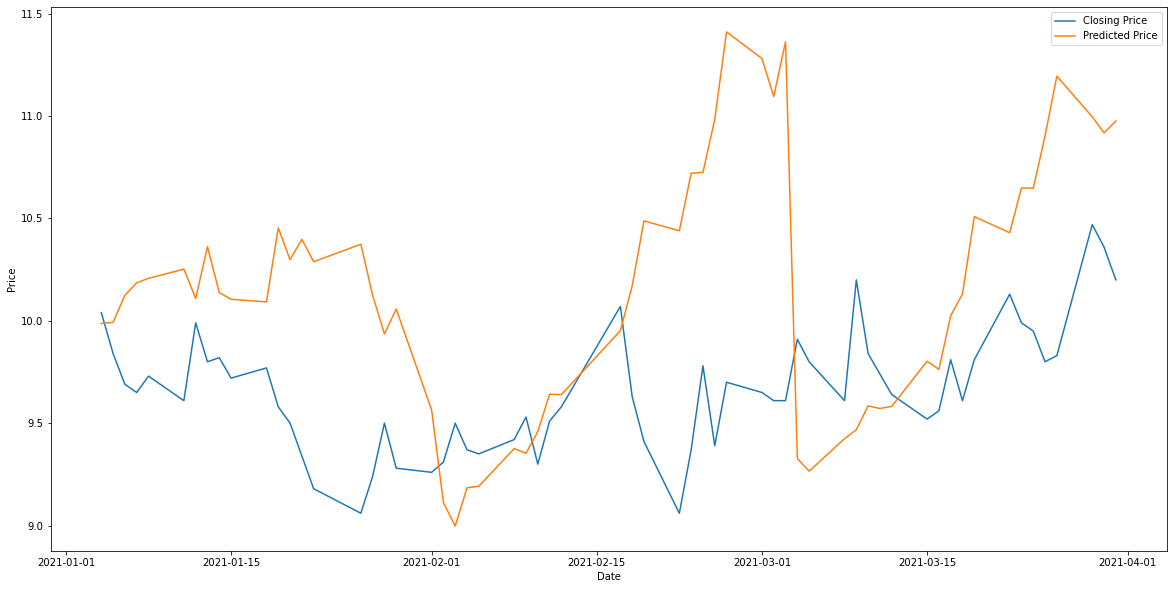

In [213]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly price predictions are very inaccurate and it seems like it would be difficult to make a profit using this data, but let's see how our investment strategy performs with this data.

In [217]:
boll_monthly = BEEF[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 20)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/391167574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/391167574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/391167574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,12.570000,NaN,NaN,NaN
1,2020-01-03,12.900000,NaN,NaN,NaN
2,2020-01-06,12.890000,NaN,NaN,NaN
3,2020-01-07,13.480000,NaN,NaN,NaN
4,2020-01-08,13.630000,NaN,NaN,NaN
...,...,...,...,...,...
304,2021-03-25,10.903446,10.211779,11.673252,8.750305
305,2021-03-26,11.195059,10.200972,11.627891,8.774053
306,2021-03-29,10.996382,10.186723,11.573337,8.800108
307,2021-03-30,10.917793,10.177834,11.542014,8.813653


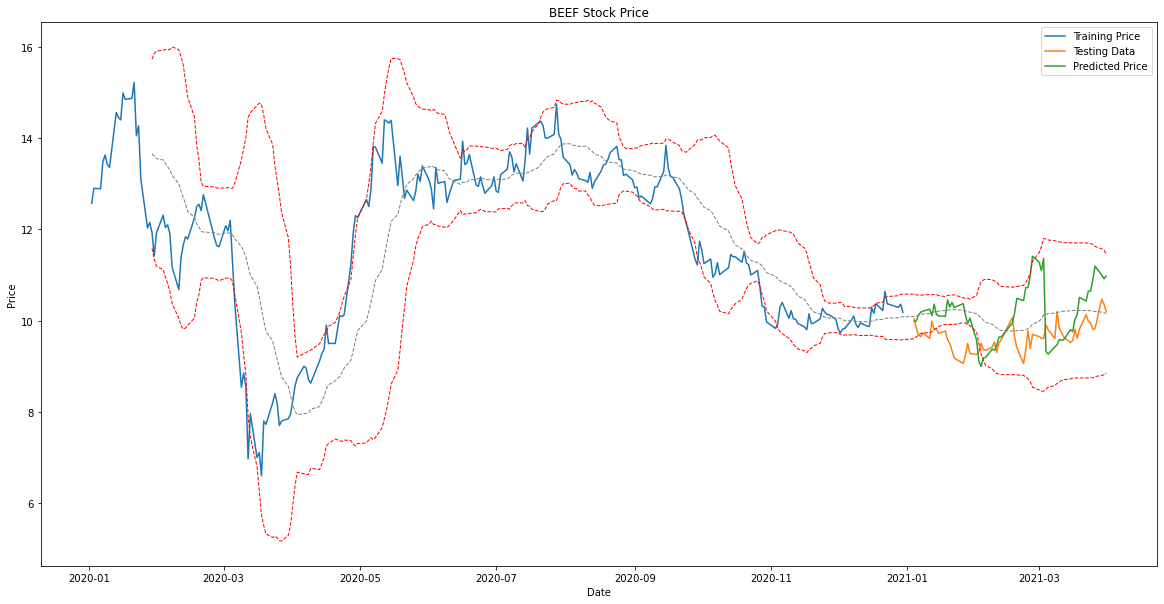

In [218]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BEEF Stock Price')
plt.legend()
plt.show()

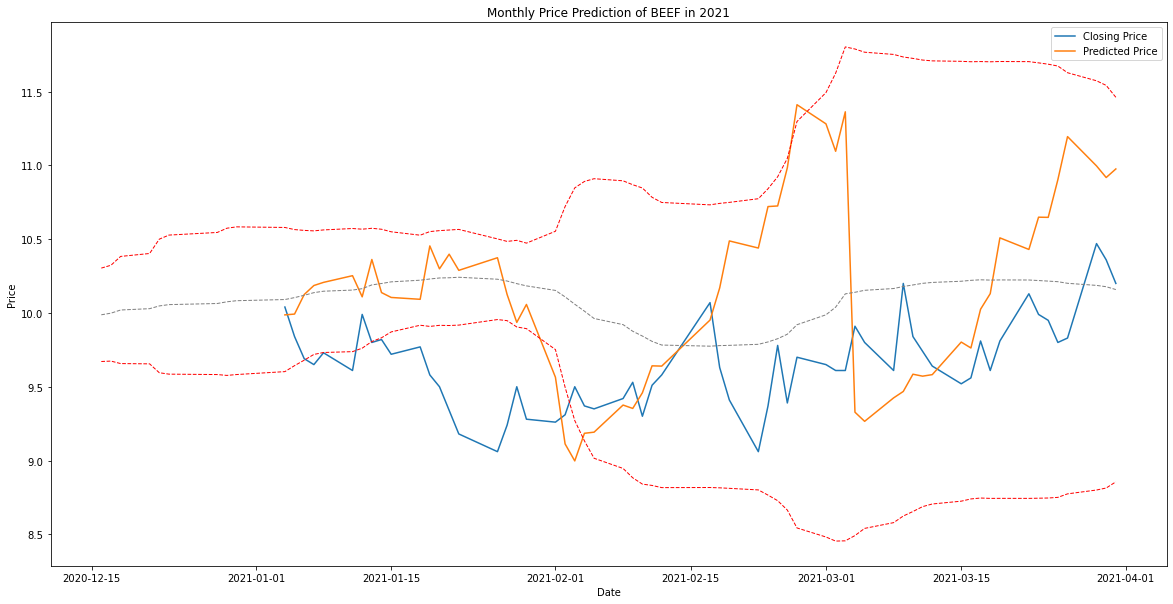

In [219]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][249:], boll_monthly['upper_bb'][249:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][249:], boll_monthly['lower_bb'][249:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][249:], boll_monthly['SMA'][249:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of BEEF in 2021')
plt.legend()
plt.show()

In [220]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_19232/3844387549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
249,2021-01-04,9.986886,10.090844,10.579326,9.602363,10.04
250,2021-01-05,9.992348,10.103962,10.564961,9.642963,9.84
251,2021-01-06,10.124942,10.119709,10.559454,9.679963,9.69
252,2021-01-07,10.185868,10.137502,10.556185,9.718820,9.65
253,2021-01-08,10.207222,10.147363,10.562678,9.732049,9.73
254,2021-01-11,10.252522,10.154989,10.572239,9.737740,9.61
255,2021-01-12,10.109279,10.164453,10.567609,9.761297,9.99
256,2021-01-13,10.362274,10.190067,10.573726,9.806408,9.80
257,2021-01-14,10.138096,10.199472,10.567245,9.831699,9.82
258,2021-01-15,10.105016,10.210723,10.550010,9.871436,9.72


In [221]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
268,2021-02-01,9.564301,10.152688,10.553503,9.751873,9.26
269,2021-02-02,9.112288,10.108958,10.721081,9.496836,9.31
270,2021-02-03,8.997328,10.059207,10.847599,9.270815,9.50


In [222]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
285,2021-02-26,11.411189,9.9202,11.29731,8.543091,9.7


There are 3 buyign indicators to choose from. I'll choose the date with the lowest predicted price on 02-03-2021 with a closing price of \\$9.50. The only selling indicator is on 02-26-2021 with a closing price of \\$9.70. This results in a profit of 2.1%. 

Surprisingly I was able to still realize some profit using the inaccurate monthly price predictions.

# Conclusion

Using price predictions with an LSTM model on BEEF, I was able to make profits with the daily and monthly price predictions. However the using the weekly price predictions resulted in a loss. The best performance was on the daily price predictions with a 13.5% profit.

The weekly and monthly price predictions were pretty inaccurate. Using the weekly price predictions resulted in a 3.5% loss, while using the monthly price predictions resulted in a 2.1% profit.

I would recommend an investment strategy using the indicators given with the daily price predictions. Using this strategy leads to a profit of 13.5%.